In [20]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

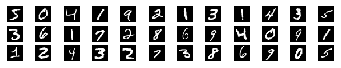

In [21]:
mnist = keras.datasets.mnist
(X_train0,y_train0),(X_test0,y_test0)=mnist.load_data()
import matplotlib.pylab as plt
plt.figure(figsize=(6,1))
for i in range(36):
    plt.subplot(3,12,i+1)
    plt.imshow(X_train0[i],cmap="gray")
    plt.axis("off")
plt.show()

In [22]:
img_rows=28
img_cols=28
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

input_shape=(img_rows,img_cols,1)
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

batch_size=128
num_classes=10
epochs=12

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [25]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(64,(2,2),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
hist = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)             

Test loss:  0.02109336081832316
Test accuracy:  0.9936000108718872


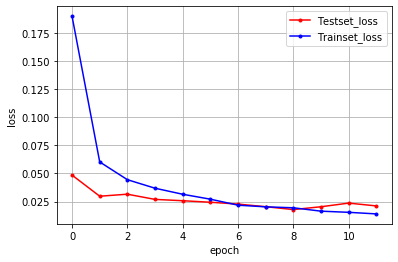

In [26]:
score=model.evaluate(x_test,y_test,verbose=0)
print("Test loss: ",score[0])
print("Test accuracy: ",score[1])

import numpy as np
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c="red",label="Testset_loss")
plt.plot(x_len,y_loss,marker='.',c="blue",label="Trainset_loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

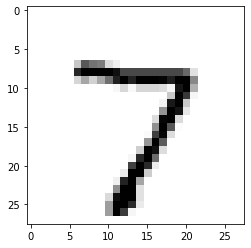

The Answer is  [7]


In [30]:
n = 0
plt.imshow(x_test[n].reshape(28,28),cmap='Greys',interpolation='nearest')
plt.show()
print("The Answer is ",model.predict_classes(x_test[n].reshape((1,28,28,1))))